**Artificial Neural networks (ANN)**

ANN - Components:

1. Input layer
2. Hidden layer
3. Output layer

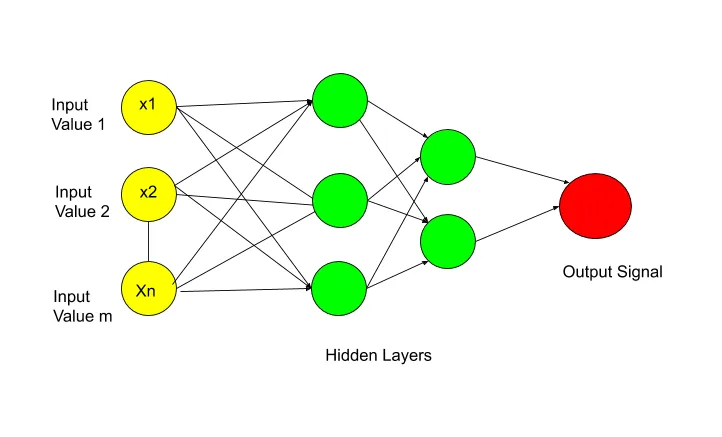

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# load dataset

dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [111]:
# Geography 	Gender	  	NumOfProducts

dataset = pd.get_dummies(dataset, columns=['Geography'])
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [112]:
dataset = pd.get_dummies(dataset, columns=['Gender'])
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [113]:
dataset.drop(labels = ["RowNumber", "CustomerId","Surname"], axis = 1, inplace = True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [114]:
X = dataset.drop(['Exited'], axis=1)
y = dataset['Exited'].values

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [117]:
# Feature scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

In [126]:
# ANN

!pip install tensorflow

In [ ]:
pip install keras

In [121]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (8000, 13)
x test:  (2000, 13)
y train:  (8000,)
y test:  (2000,)


In [119]:
from keras.models import Sequential # NN
from keras.layers import Dense # build the layers


In [122]:
#create ANN Model
ann_model = Sequential() # created ANN Model

# input layer
ann_model.add(Dense(10, activation='relu', input_dim =X_train.shape[1]))

#hidden layer
ann_model.add(Dense(8, activation='relu'))

#output layer
ann_model.add(Dense(1, activation = 'sigmoid'))

In [123]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [124]:
ann_model.fit(X_train, y_train, batch_size = 25, epochs=100, verbose = 1)

Epoch 1/100
320/320 [==============================] - 2s 4ms/step - loss: 0.5080 - accuracy: 0.7639
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.7959
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8051
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8196
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8336
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8436
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8487
Epoch 8/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8504
Epoch 9/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8521
Epoch 10/100
320/320 [==============================] - 1s 2ms/step - loss: 0.3567 - accura

In [127]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.987339,-0.760160,1.031225,1.114874,-0.914437,0.640848,-1.029948,0.656668,0.998751,-0.576965,-0.576773,-0.919712,0.919712
1,1.179944,0.002790,1.377884,0.994192,-0.914437,0.640848,-1.029948,-0.859246,-1.001251,1.733206,-0.576773,1.087297,-1.087297
2,-1.910248,1.624056,-1.048731,0.570977,2.513631,0.640848,-1.029948,1.699601,-1.001251,1.733206,-0.576773,1.087297,-1.087297
3,0.174076,-0.283316,1.377884,-1.221749,0.799597,0.640848,0.970923,-1.032840,0.998751,-0.576965,-0.576773,-0.919712,0.919712
4,0.495539,-0.092579,-1.395390,1.530901,-0.914437,-1.560433,-1.029948,-1.433499,-1.001251,-0.576965,1.733785,1.087297,-1.087297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.796181,-1.427740,-1.048731,0.310774,0.799597,-1.560433,-1.029948,1.093806,-1.001251,1.733206,-0.576773,1.087297,-1.087297
1996,-0.966599,0.670370,-0.355412,0.318743,0.799597,0.640848,0.970923,0.290550,0.998751,-0.576965,-0.576773,1.087297,-1.087297
1997,2.071745,0.479633,-0.702072,1.027063,0.799597,-1.560433,0.970923,1.502806,-1.001251,1.733206,-0.576773,-0.919712,0.919712
1998,-1.453978,0.479633,-0.355412,0.749588,-0.914437,0.640848,-1.029948,-1.234012,-1.001251,1.733206,-0.576773,1.087297,-1.087297


In [128]:
# prediction
y_pred = ann_model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [130]:
ann_model.predict([[-0.987339,-0.760160,1.031225,1.114874,-0.914437,0.640848,-1.029948,0.656668,0.998751,-0.576965, -0.576773, -0.919712, 0.919712]])


1/1 [==============================] - 0s 73ms/step


array([[0.12245125]], dtype=float32)

In [131]:
score, acc = ann_model.evaluate(X_train, y_train, batch_size = 10)
print('Train Score:', score)
print('Train Accuracy', acc)

800/800 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8687
Train Score: 0.32256123423576355
Train Accuracy 0.8687499761581421


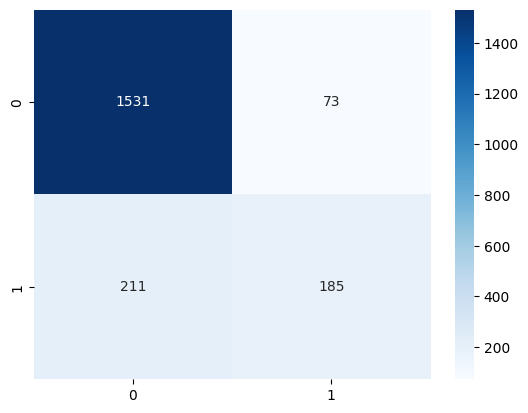

In [133]:
y_pred = (y_pred >0.5) * 1
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f', cmap='Blues')
plt.show()

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1604
           1       0.72      0.47      0.57       396

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

